In [106]:
# import library for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
# keras and sklearn library
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras import layers

In [108]:
# read the seattle weather data
df = pd.read_csv('seattle-weather.csv')
df.head(4)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain


In [109]:
# check the data type
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [110]:
# convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [111]:
# set the date column as index
df.set_index('date', inplace=True)

In [112]:
# number of rows and columns
df.shape

(1461, 5)

In [113]:
# check the missing values
df.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [114]:
# drop the missing values
df.dropna(inplace=True)

In [115]:
# check the missing values
df.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [116]:
#Check Duplicated Rows
df.duplicated().sum() 

8

In [117]:
# show class variables 
df['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [118]:
# preprocessing of the data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['weather_label'] = le.fit_transform(df['weather'])
df.head(10)

,precipitation,temp_max,temp_min,wind,weather,weather_label
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
2012-01-02,10.9,10.6,2.8,4.5,rain,2
2012-01-03,0.8,11.7,7.2,2.3,rain,2
2012-01-04,20.3,12.2,5.6,4.7,rain,2
2012-01-05,1.3,8.9,2.8,6.1,rain,2
2012-01-06,2.5,4.4,2.2,2.2,rain,2
2012-01-07,0.0,7.2,2.8,2.3,rain,2
2012-01-08,0.0,10.0,2.8,2.0,sun,4
2012-01-09,4.3,9.4,5.0,3.4,rain,2


In [119]:
#Store labels and name for final use
weather_dict = dict(zip(df['weather_label'], df['weather']))
weather_dict

{0: 'drizzle', 2: 'rain', 4: 'sun', 3: 'snow', 1: 'fog'}

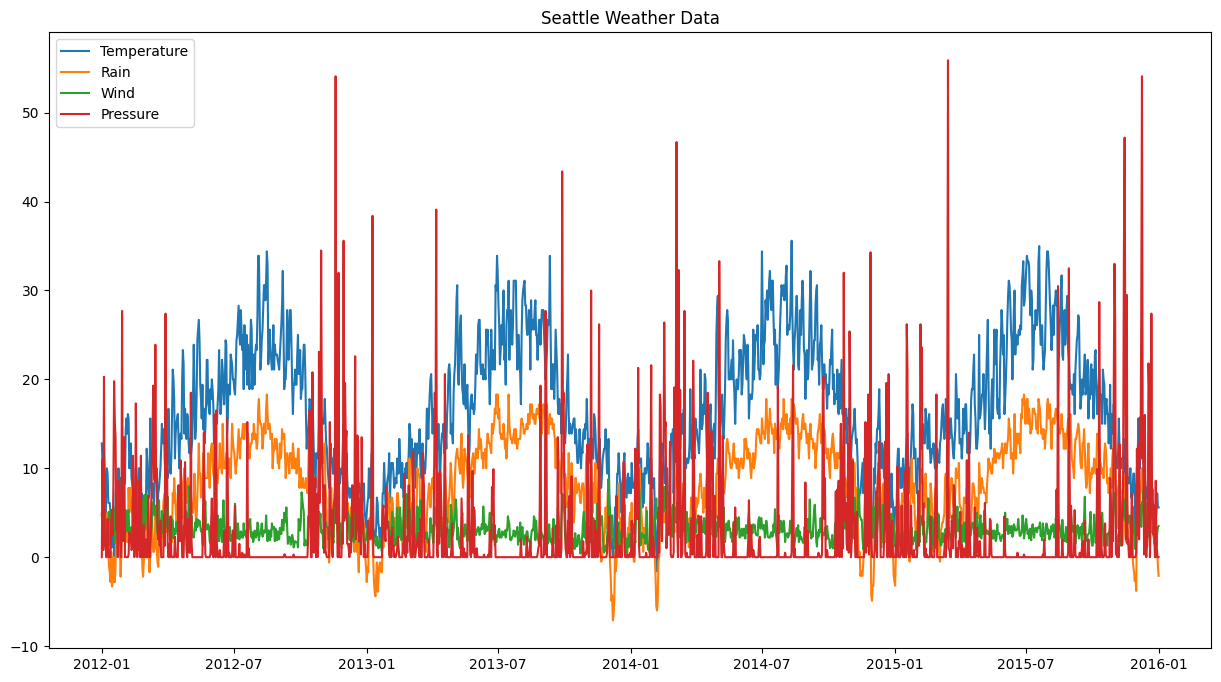

In [122]:
# visualize the data
plt.figure(figsize=(15,8))
plt.plot(df['temp_max'], label='Temperature')
plt.plot(df['temp_min'], label='Rain')
plt.plot(df['wind'], label='Wind')
plt.plot(df['precipitation'], label='Pressure')
plt.legend(loc='best')
plt.title('Seattle Weather Data')
plt.show()

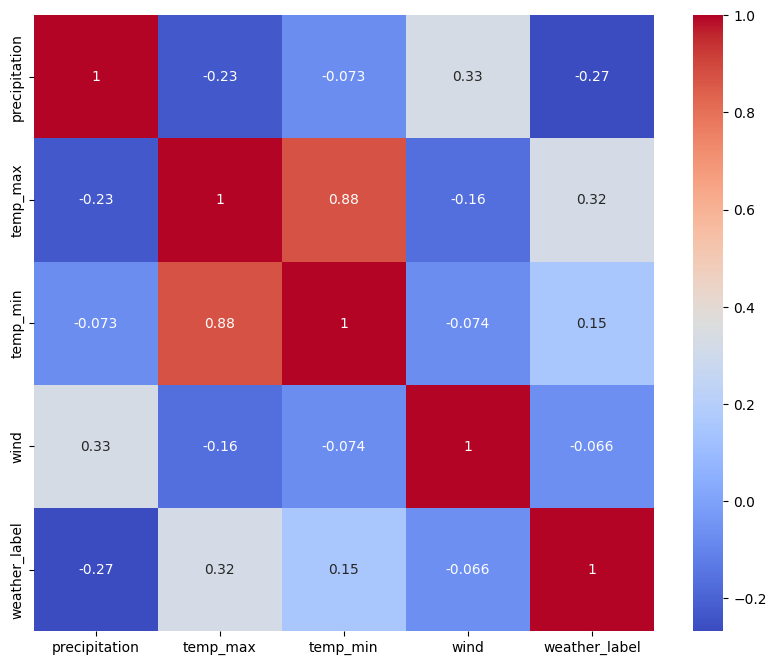

In [123]:
# Show the correlation between the variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [124]:
# drop the weather column with caracter values
df_final = df.drop(['precipitation' ,'temp_max', 'temp_min' , 'weather'],axis=1)
df_final

,wind,weather_label
date,,
2012-01-01,4.7,0
2012-01-02,4.5,2
2012-01-03,2.3,2
2012-01-04,4.7,2
2012-01-05,6.1,2
...,...,...
2015-12-27,2.9,2
2015-12-28,1.3,2
2015-12-29,2.6,1


In [127]:
# split the data into train and test
train = df_final[:'2014'].drop('weather_label', axis=1)
test = df_final['2015':].drop('weather_label', axis=1)

In [128]:
train

,wind
date,
2012-01-01,4.7
2012-01-02,4.5
2012-01-03,2.3
2012-01-04,4.7
2012-01-05,6.1
...,...
2014-12-27,4.9
2014-12-28,1.8
2014-12-29,4.3


In [143]:
# let's show the form of our data
train.plot(figsize = (12,6))

ModuleNotFoundError: No module named 'symbol'

In [80]:
# split the data into X and y
X_train = train.drop(['weather_label'], axis=1)
y_train = train['weather_label']

X_test = test.drop(['weather_label'], axis=1)
y_test = test['weather_label']

In [129]:
# scale the data
scaler = StandardScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [130]:
# to generate out timeseries , we going to use the following Keras function
from keras.preprocessing.sequence import TimeseriesGenerator

In [131]:
# let's now define our generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(
                  scaled_train , 
                  scaled_train ,
                  length = n_input,
                  batch_size = n_features
            )

In [135]:
# let's now understand the principe of generator 
X , Y = generator[1]
print(f'Using This Array : {X} ')
print(f'We Gonna using this as target : {Y}')

Using This Array : [[[ 0.83738056]
  [-0.65824315]
  [ 0.97334635]
  [ 1.9251069 ]
  [-0.72622605]
  [-0.65824315]
  [-0.86219184]
  [ 0.08956871]
  [ 0.08956871]
  [ 1.24527794]
  [-0.93017473]
  [-1.33807211]]] 
We Gonna using this as target : [[1.38124373]]


In [136]:
# We all know that to create an LSTM model you are in need of keras library
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [139]:
# now we pass into define our models setting considering Layers , Hidden , Input/Output and more
model = Sequential()
model.add(
    LSTM(
        100 , 
        activation = 'relu',
        input_shape = (n_input , n_features)
    )
)
model.add(
    Dense(1)
)
model.compile(
    optimizer = 'adam',
    loss = 'mse'
)
  

In [140]:
# Its better to present a summary of our own model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100)               40800     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [141]:
# Now the easiet Part , fit of our model
model.fit(
    generator , 
    epochs=50
  )

Epoch 1/50
1084/1084 [==============================] - 11s 8ms/step - loss: 0.8708 - accuracy: 0.0000e+00
Epoch 2/50
1084/1084 [==============================] - 8s 8ms/step - loss: 0.8388 - accuracy: 0.0000e+00
Epoch 3/50
1084/1084 [==============================] - 10s 9ms/step - loss: 0.8322 - accuracy: 0.0000e+00
Epoch 4/50
1084/1084 [==============================] - 9s 9ms/step - loss: 0.8360 - accuracy: 0.0000e+00
Epoch 5/50
1084/1084 [==============================] - 10s 9ms/step - loss: 0.8300 - accuracy: 0.0000e+00
Epoch 6/50
1084/1084 [==============================] - 12s 11ms/step - loss: 0.8291 - accuracy: 0.0000e+00
Epoch 7/50
1084/1084 [==============================] - 9s 9ms/step - loss: 0.8275 - accuracy: 0.0000e+00
Epoch 8/50
1084/1084 [==============================] - 9s 8ms/step - loss: 0.8279 - accuracy: 0.0000e+00
Epoch 9/50
1084/1084 [==============================] - 8s 7ms/step - loss: 0.8235 - accuracy: 0.0000e+00
Epoch 10/50
1084/1084 [==================

KeyboardInterrupt: 

In [ ]:
# Logistec Regression
from sklearn.linear_model import LogisticRegression
class_model = LogisticRegression()
class_model.fit(np.array(X_train).reshape(-1, 1) , Y_train)

In [ ]:
# make prediction
y_pred = class_model.predict(np.array(X_test).reshape(-1, 1))


In [ ]:
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
cm